<h1>Итоговое задание</h1>

<blockquote>
    <span style="font-size:0.8em"><strong>Задание:</strong>
      <ol>
        <li>Загрузите файл HR.csv в pandas dataframe</li>
        <li>Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)</li>
        <li>Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные</li>
        <li>Рассчитайте сколько сотрудников работает в каждом департаменте</li>
        <li>Показать распределение сотрудников по зарплатам</li>
        <li>Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности</li>
        <li>Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом</li>
        <li>Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): a) Доля сотрудников с повышением за последние 5 лет; b) Средняя степень удовлетворенности; c) Среднее количество проектов</li>
        <li>Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке</li>
        <li>Загрузить jupyter notebook с решением на github и прислать ссылку</li>
      </ol>
    </span>
</blockquote>

<p style='text-align: right; font-weight: bold; font-size: 14px; font-family: Verdana, sans-serif;'>
    Исследование и подготовка данных
</p>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sns.set_style()

In [2]:
df=pd.read_csv('HR.csv')
print(f'В DataFrame {len(df)} наблюдений и {len(df.columns)} признаков (параметров)')

describ=[
    'Уровень удовлетворенности работой', 
    'Время с момента последней оценки в годах', 
    'Количество проектов, выполненных за время работы', 
    'Среднее количество часов на рабочем месте в месяц', 
    'Стаж работы в компании в годах', 
    'Происходили ли несчастные случаи на рабочем месте с сотрудником', 
    'Уволился ли сотрудник',
    'Повышался ли сотрудник за последние пять лет',
    'Отдел в котором работает сотрудник',
    'Относительный уровень зарплаты']

parameter=[
    'numerical',
    'numerical',
    'numerical',
    'numerical',
    'numerical',
    'categorial',
    'categorial',
    'categorial',
    'categorial',
    'categorial'    
]

df_info=pd.DataFrame()
df_info['columns_name']=df.columns
df_info['describe']=describ
df_info['NaN']=list(df.isnull().sum())
df_info['type']=list(df.dtypes)
df_info['parameter']=parameter

df_info

В DataFrame 14999 наблюдений и 10 признаков (параметров)


,columns_name,describe,NaN,type,parameter
0,satisfaction_level,Уровень удовлетворенности работой,0,float64,numerical
1,last_evaluation,Время с момента последней оценки в годах,0,float64,numerical
2,number_project,"Количество проектов, выполненных за время работы",0,int64,numerical
3,average_montly_hours,Среднее количество часов на рабочем месте в месяц,0,int64,numerical
4,time_spend_company,Стаж работы в компании в годах,0,int64,numerical
5,Work_accident,Происходили ли несчастные случаи на рабочем ме...,0,int64,categorial
6,left,Уволился ли сотрудник,0,int64,categorial
7,promotion_last_5years,Повышался ли сотрудник за последние пять лет,0,int64,categorial
8,department,Отдел в котором работает сотрудник,0,object,categorial
9,salary,Относительный уровень зарплаты,0,object,categorial


<strong>2.Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).</strong>

In [3]:
# Основные статистики
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Мода
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>,
        <AxesSubplot:title={'center':'average_montly_hours'}>],
       [<AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>,
        <AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>]],
      dtype=object)

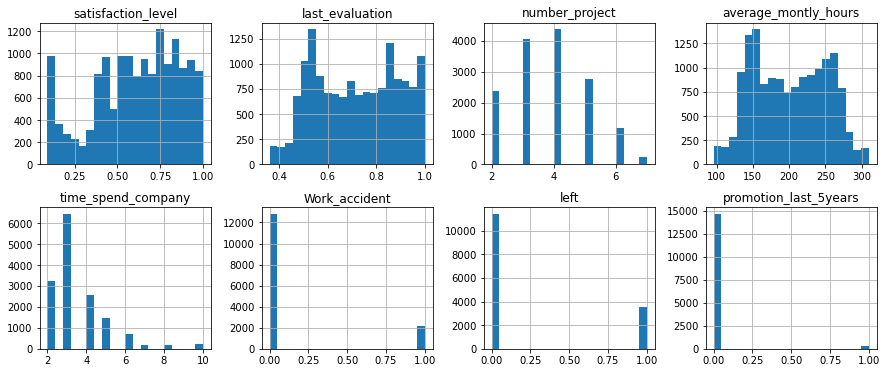

In [5]:
# Распределение количественных признаков
df.hist(bins=20, figsize=(15, 6), layout=(2, 4))

<AxesSubplot:>

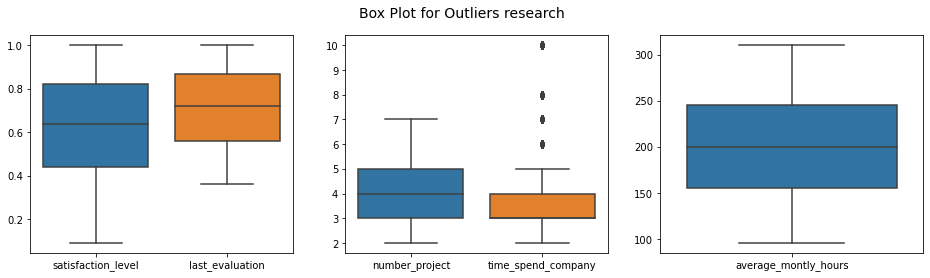

In [6]:
#Выбросы

fig=plt.figure(figsize=(16, 4))
fig.suptitle('Box Plot for Outliers research', fontsize=14)

ax1=fig.add_subplot(1,3,1)
sns.boxplot(data=df[['satisfaction_level','last_evaluation']])
ax2=fig.add_subplot(1,3,2)
sns.boxplot(data=df[['number_project','time_spend_company']])
ax3=fig.add_subplot(1,3,3)
sns.boxplot(data=df[['average_montly_hours']])


In [7]:
# Распределение значений в столбце с выбросами
df['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

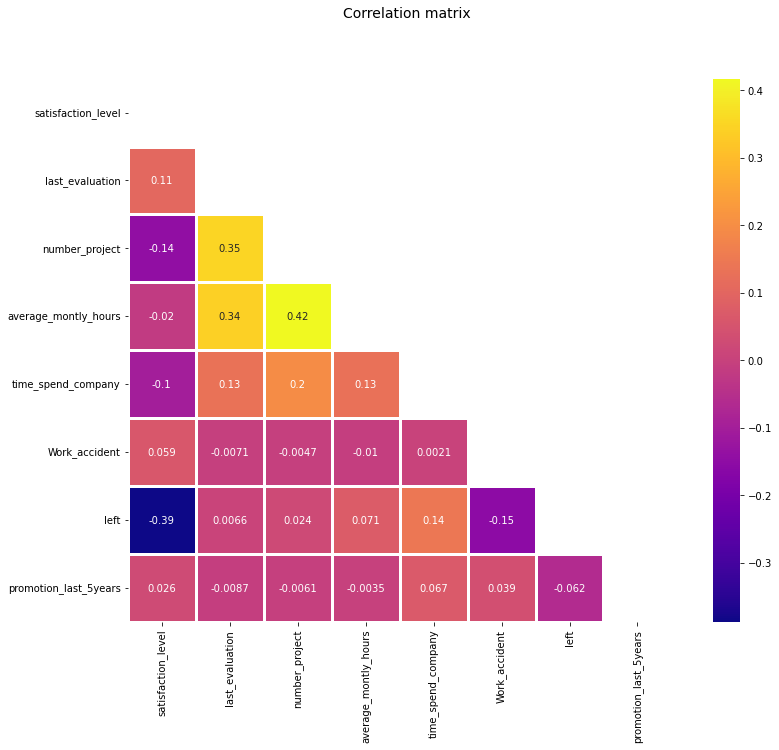

In [8]:
# Матрица корреляций
df_corr=df.corr()
display(df_corr)
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Correlation matrix', fontsize=14)
matrix = np.triu(df_corr.corr())
sns.heatmap(df_corr, cmap = 'plasma', annot = True, mask = matrix, square=True, linewidths=3, linecolor='white')

Text(0.5, 1.0, 'Without correlation')

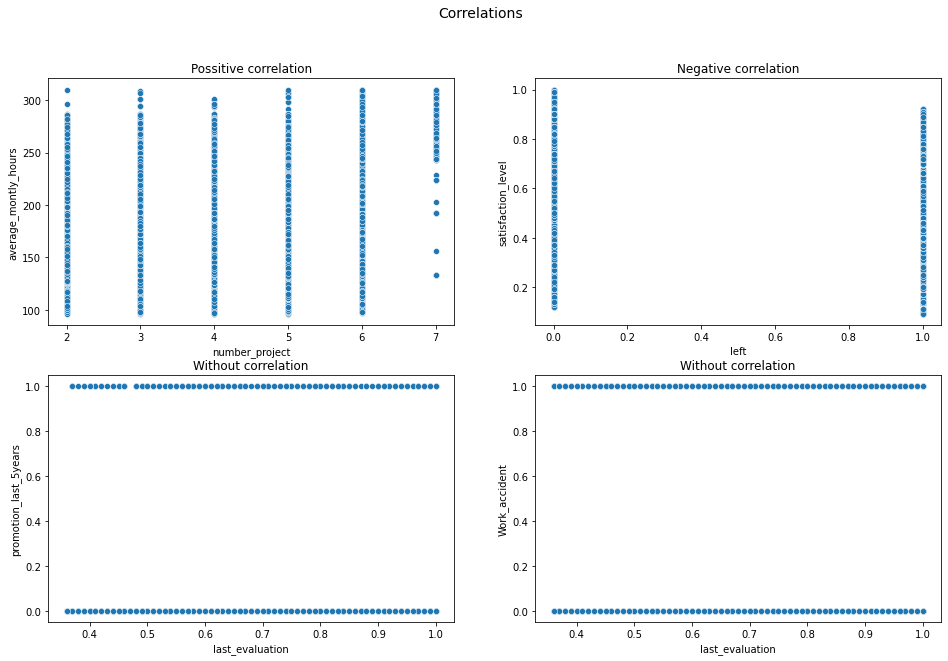

In [9]:
# Наиболее и наименее скореллированные переменные
fig=plt.figure(figsize=(16, 10))
fig.suptitle('Correlations', fontsize=14)

ax1=fig.add_subplot(2,2,1)
sns.scatterplot(data=df, x='number_project', y='average_montly_hours').set_title('Possitive correlation')

ax2=fig.add_subplot(2,2,2)
sns.scatterplot(data=df, x='left', y='satisfaction_level').set_title('Negative correlation')

ax3=fig.add_subplot(2,2,3)
sns.scatterplot(data=df, x='last_evaluation', y='promotion_last_5years').set_title('Without correlation')

ax4=fig.add_subplot(2,2,4)
sns.scatterplot(data=df, x='last_evaluation', y='Work_accident').set_title('Without correlation')

<blockquote>
    <span style="font-size:1.0em">
        <strong>Выводы:</strong><br><br>  
            В фаиле HR.csv содержится база данных с информацией о 14999 сотрудниках. Имеется 5 категориальных признаков и 5 количественных. Значения NaN отсутствуют. Распределение числовых переменных не относится к нормальному типу. <br> <br> 
        Переменная average_montly_hours имеет два значения моды и бимодальное распределение.<br> <br> 
        Переменная time_spend_company содержит выбросы, которые, тем не менее, являются значимыми для дальнейшего анализа, поэтому работа с ними не проводится.<br> <br> 
        Наиболее скореллированные переменные:  <br> <ul>
        <li>number_project и average_montly_hours (r=0.417211, прямая зависимость).</li>
        <li>left и satisfaction_level (r=-0.388375, обратная зависимость)</li>
        </ul><br>
        Наименеее скоррелированные переменные: <br> <ul>
        <li>last_evaluation и promotion_last_5years (r=-0.008684)</li>
        <li>last_evaluation и Work_accident (r=-0.007104)</li>
        </ul><br><br>
        При анализе корреляций, мы пожем предположить, что: <br> <ul>
        <li>Чем больше часов в месяц с среднем работает сотрудник, тем больше он имеет выполненных проектов</li>
        <li>Сотрудники увольнялись тем чаще, чем ниже был их уровень удовлетворенности работой</li>
        </ul><br>
        В некоторой, незначительной степени (коэфициент корреляции примерно равен 0.1-0.3) мы можем наблюдать, что:<br> <ul>
        <li>Чаще увольнялись сотрудники, у которых стаж работы в компании был в среднем немного больше, что логично. Но при этом,  чаще увольнялись сотрудникии у которых несчастных случаев на работе в среднем было немного меньше. Эта гипотеза выглядит странной и необходимо проверить ее дополнительно.</li>
        <li>Обычно чем больше времени сотрудник проводит на работе и чем больше у него выполненных проектов, тем реже для него проводятся проверки.</li>
        <li>Люди, у которых стаж работы в компании больше, в среднем работают немного больше часов в месяц.</li>
        </ul><br>
    </span>
</blockquote>

<p style='text-align: right; font-weight: bold; font-size: 14px; font-family: Verdana, sans-serif;'>
    Анализ данных
</p>

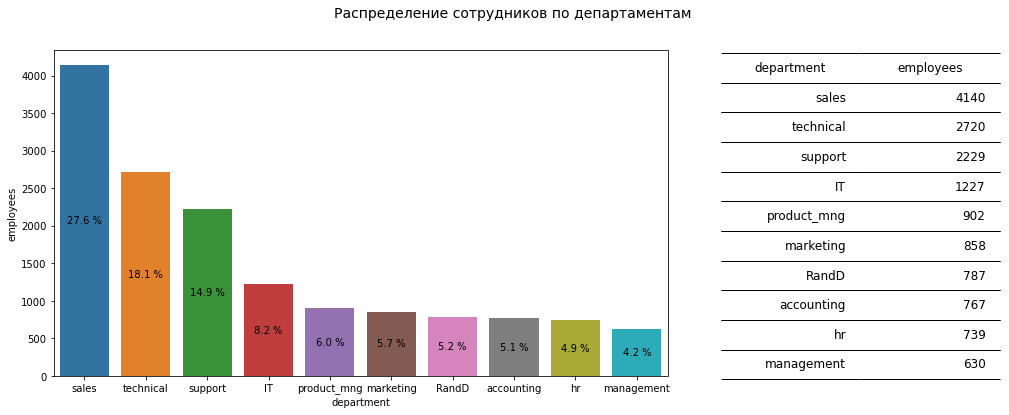

In [10]:
# Задание: Рассчитайте сколько сотрудников работает в каждом департаменте
df_employees=df['department'].value_counts().reset_index()
df_employees.rename(columns = {'index' : 'department', 'department' : 'employees'}, inplace = True)

print('')

fig=plt.figure(figsize=(17, 6))
gs = GridSpec(ncols=3, nrows=1, figure=fig)
fig.suptitle('Распределение сотрудников по департаментам', fontsize=14)

ax1=fig.add_subplot(gs[0, 0:2])
sns.barplot(data=df_employees,x='department', y='employees')

for p in ax1.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    per=round(h/len(df)*100,1)
    text = f'{per} %'
    ax1.annotate(text=text, xy=xy, ha='center', va='center')

ax2=fig.add_subplot(gs[0, 2])
plt.axis('off')
table = ax2.table (cellText=df_employees.values , colLabels=df_employees.columns, loc='left', cellLoc = 'right', rowLoc = 'left', bbox=[-.01,-.01,1,1], edges='horizontal')
table.set_fontsize(12)

<blockquote>
    <span style="font-size:1.0em">
        <strong>Выводы:</strong><br><br>  
            Сотрудники компании наравномерно распределены по 10 разным отделам. При том 60% всех сотрудников работают в отделе продаж, техническом отделе или поддержке подльзователей, еще 8% в IT. Такое распределение может иметь IT-компания,  ориентированая на предоставление населению услуг связи, например крупный интернет-провайдер, оператор сотовой связи и т.д. 
    </span>
</blockquote>

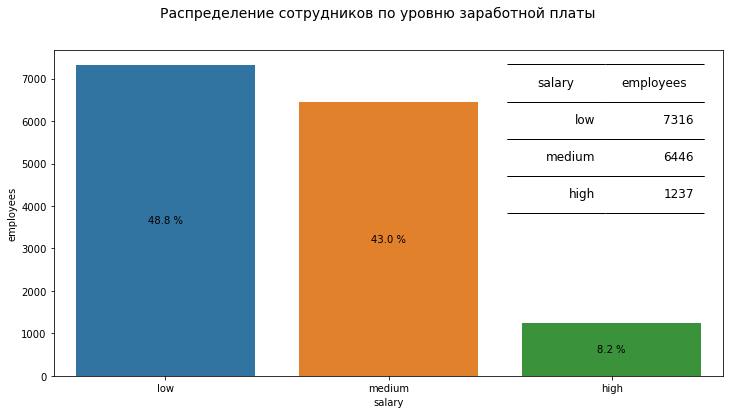

In [11]:
# Задание: Показать распределение сотрудников по зарплатам
df_sal=df['salary'].value_counts().reset_index()
df_sal.rename(columns = {'index' : 'salary', 'salary' : 'employees'}, inplace = True)

print('')

fig=plt.figure(figsize=(12, 6))
fig.suptitle('Распределение сотрудников по уровню заработной платы', fontsize=14)

ax1=fig.add_subplot(1,1,1)
sns.barplot(data=df_sal,x='salary', y='employees')

for p in ax1.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    per=round(h/len(df)*100,1)
    text = f'{per} %'
    ax1.annotate(text=text, xy=xy, ha='center', va='center')

ax2=fig.add_subplot(2,3,3)
plt.axis('off')
table = ax2.table (cellText=df_sal.values , colLabels=df_sal.columns, loc='center', cellLoc = 'right', rowLoc = 'left', bbox=[-.1,-.1,1,1], edges='horizontal')
table.set_fontsize(12)

<blockquote>
    <span style="font-size:1.0em">
        <strong>Выводы:</strong><br><br>  
            Зарплаты 8.2% сотрудников относятся к категории "Высокие", вероятно, речь идет о топ-менеджменте, руководителях отделов. Сотрудники с зарпалатами "Средние" и "Низкие" распределены, на первый взгляд, практически равномерно. Необходимо видеть распределение зарплат в каждом отделе, чтобы строить какие-либо предположения.
    </span>    
</blockquote>

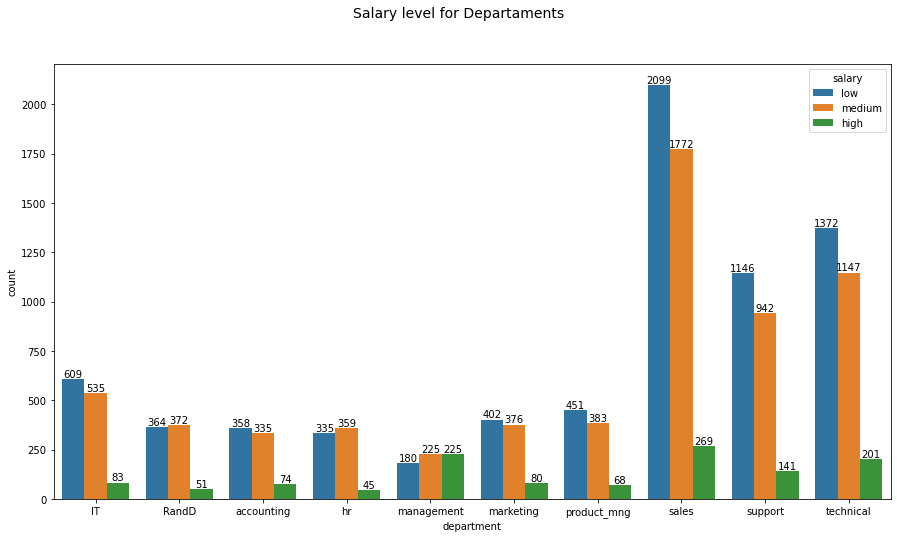

In [12]:
# Задание: Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
print('')
df_salary_level = df.groupby(by=['department'],as_index=False)['salary'].value_counts()
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle('Salary level for Departaments', fontsize=14)
sns.barplot(data=df_salary_level,x='department', y='count', hue='salary')
for i in ax.containers:
    ax.bar_label(i,)

# DataFrame df_salary_level закомментирован для сокращения объема output
# display(df_salary_level)


<blockquote>
    <span style="font-size:1.0em">
        <strong>Выводы:</strong><br><br>  
            На графике распределения зарплат для каждого департамента в отдельности, видно:
        <ul>
            <li>Отдел management имеет одинаковое количество сотрудников с зарплатами в категориях "Средние" и "Высокие". Так же, это единственный отдел, гже количество высоких зарплат больше, чем количество низких.</li>
            <li>Только в отделах RandD, hr и management средних зарплат больше, чем низких.</li>
            <li>В отделах sales, support и technical наблюдается наибольший разрыв между средними и низкими зарплатами (разница составляет от 8% до 9% для всех сотрудников департамента), что, предположительно, можно объяснить тем, что в этих отделах больше ставок для низкоквалифицированных сотрудников.</li>
        </ul>
    </span>    
</blockquote>

<strong>Задание.  Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.</strong>

In [13]:
df_mean_montly_hours = df.groupby(by=['salary'],as_index=False)['average_montly_hours'].mean()
df_mean_montly_hours

,salary,average_montly_hours
0,high,199.867421
1,low,200.996583
2,medium,201.338349


<blockquote>
    <span style="font-size:1.0em">
        <strong>Выводы:</strong><br><br>  
            По результатам расчета среднего количества рабочих часов для каждой группы Salary, видим, что данные различаются незначитально, но можно заметить, что сотрудники с высоким окладом проводят на работе в среднем на час меньше, чем сотрудники с низким окладом. На основании данных невозможно подтвердить эту гипотезу, предполагаем, что она неверна. 
    </span>
</blockquote>

<strong>Задание. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):<br>a) Доля сотрудников с повышением за последние 5 лет; <br>b) Средняя степень удовлетворенности; <br>c) Среднее количество проектов.</strong>

In [14]:
df_person_left=df[df['left']==1] # Для сокращения кода df был разделен
df_person_hired=df[df['left']==0]

df_person_stats=pd.DataFrame()
df_person_stats['type']=['hired','left']

boost_x=round(len(df_person_hired[df_person_hired['promotion_last_5years']==1])/len(df_person_hired)*100,4)
boost_y=round(len(df_person_left[df_person_left['promotion_last_5years']==1])/len(df_person_left)*100,4)
df_person_stats['boost']=[boost_x,boost_y]

df_person_stats['mean_satisfaction']=[df_person_hired['satisfaction_level'].mean(),df_person_left['satisfaction_level'].mean()]

df_person_stats['mean_count_project']=[df_person_hired['number_project'].mean(),df_person_left['number_project'].mean()]

display(df_person_stats)


,type,boost,mean_satisfaction,mean_count_project
0,hired,2.6251,0.666810,3.786664
1,left,0.5321,0.440098,3.855503


<blockquote>
    <span style="font-size:1.0em">
        <strong>Выводы:</strong><br><br>  
            По результатам вычислений можно сделать следующие выводы:
        <ul>
                <li>Среди уволившихся сотрудников только 0.5% получали повышение в последние 5 лет. Среди сотрудников, продолжающих работу, этот показатель равен 2.6%</li>
            <li>Среди уволившихся сотрудников уровень удовлетворенности работой был ниже в среднем на 33%</li>
            <li>Среднее число выполненных проектов имеет практически одинаковые значения для этих категорий</li>
        </ul>
    </span>
</blockquote>

<strong>9.Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки.</strong>

In [15]:
x=df.iloc[:, [0,1,2,3,4,5,7]]
y=df['left']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
model=LinearDiscriminantAnalysis()
model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [23]:
model.score(x_test,y_test)

0.7557777777777778

<strong>10.Загрузить jupyter notebook с решением на github и прислать ссылку.</strong>